In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
data_path = 'data'
files = os.listdir(data_path)

# Lista para guardar los DataFrames
dfs = []

# Crear figura para los plots
plt.figure(figsize=(12, 6))

# Leer y plotear cada archivo
for file in files:
    if file.startswith('data') and file.endswith('.csv'):
        file_path = os.path.join(data_path, file)
        df = pd.read_csv(file_path)

        # Guardar el DataFrame en la lista
        dfs.append(df)

# Concatenar todos los DataFrames
df_total = pd.concat(dfs, ignore_index=True)

df_total


,NRO_CAJERO,FECHA,REMANENTE,DISPENSADO
0,0,2021-01-01,2601552,10995
1,0,2021-01-02,2601552,0
2,0,2021-01-03,2601552,0
3,0,2021-01-04,3284378,14294
4,0,2021-01-05,3284378,0
...,...,...,...,...
80816,110,2022-12-27,21380894,2627942
80817,110,2022-12-28,19599611,1781283
80818,110,2022-12-29,16026049,3573561
80819,110,2022-12-30,30182851,1209513


<Figure size 1200x600 with 0 Axes>

In [3]:
df_total['FECHA'] = pd.to_datetime(df_total['FECHA'])

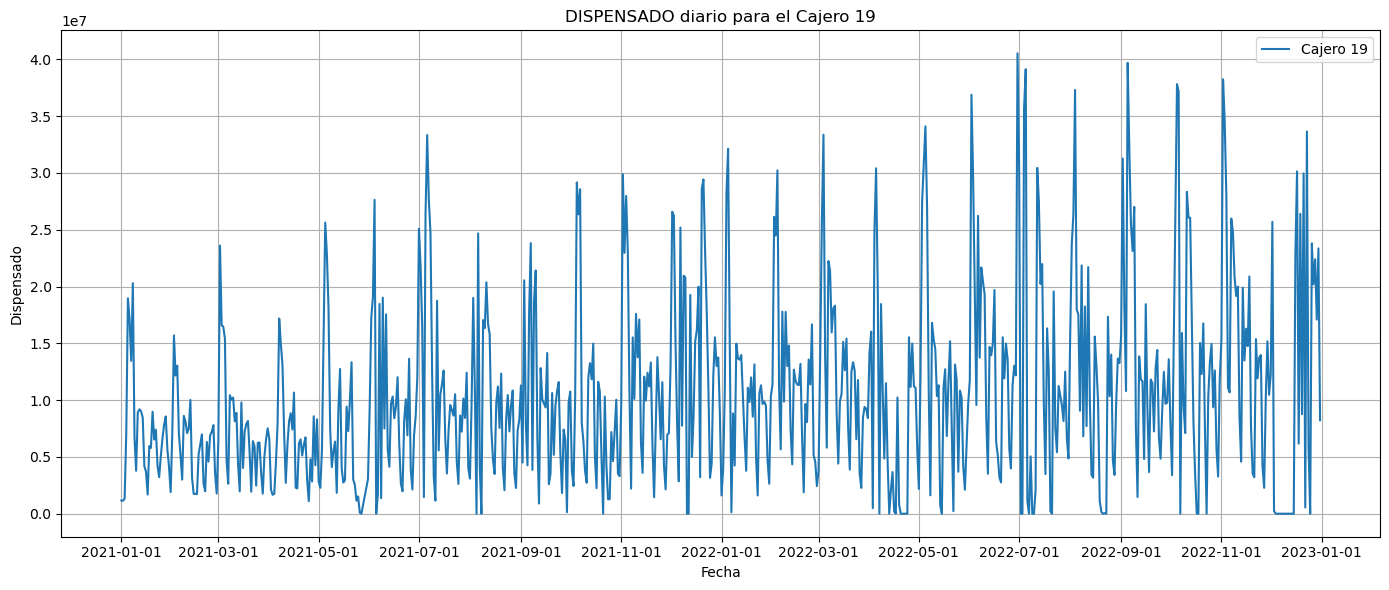

In [6]:
n = 19  # por ejemplo

# Filtrar por cajero n
df_cajero_n = df_total[df_total['NRO_CAJERO'] == n]

# Plotear
plt.figure(figsize=(14, 6))
plt.plot(df_cajero_n['FECHA'], df_cajero_n['DISPENSADO'], label=f'Cajero {n}')


ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) #Ajuste en el formato de fecha

plt.title(f'DISPENSADO diario para el Cajero {n}')
plt.xlabel('Fecha')
plt.ylabel('Dispensado')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

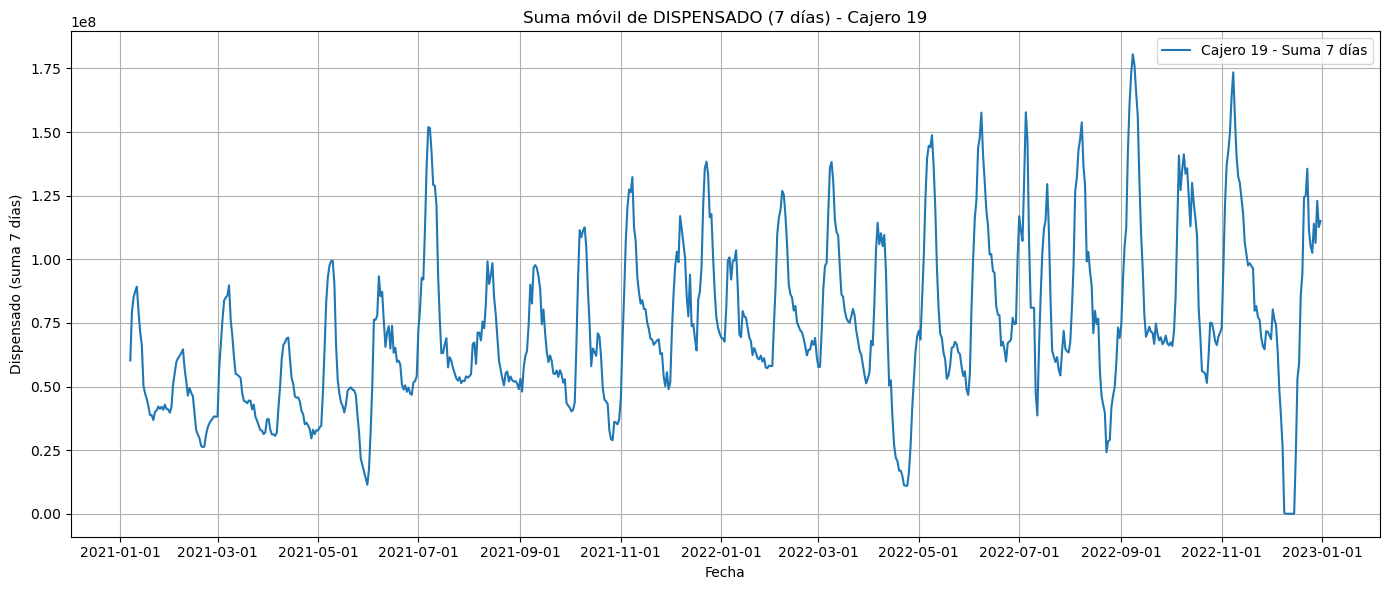

In [7]:
n= 19
 
df_cajero_n = df_total[df_total['NRO_CAJERO'] == n].sort_values('FECHA')

# Asegúrate de que la columna 'FECHA' sea de tipo datetime
df_cajero_n['FECHA'] = pd.to_datetime(df_cajero_n['FECHA'])

DIAS = 7
# Aplicar suma de ventana deslizante de 5 días
# Primero agrupar por fecha si hay múltiples entradas por fecha (opcional según tu estructura)
serie_rolling = df_cajero_n.set_index('FECHA')['DISPENSADO'].rolling(window=DIAS).sum()

# Plotear
plt.figure(figsize=(14, 6))
plt.plot(serie_rolling.index, serie_rolling.values, label=f'Cajero {n} - Suma {DIAS} días')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) #Ajuste en el formato de fecha

plt.title(f'Suma móvil de DISPENSADO ({DIAS} días) - Cajero {n}')
plt.xlabel('Fecha')
plt.ylabel(f'Dispensado (suma {DIAS} días)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Variables:
- Interpolacion de data en cajeros que faltan.
- Dia de la semana(one hot enconding)
- Separar fecha en (año, mes, dia)
- Inflacion mensual (se usa la del mes anterior)
- Dias imporantes (navidad, reyes, dia del ñino/madre/padre)
- Media dispensado ultimos dias 3,7,15,30 para predecir dia i+1.

----------
- Clustering de cajeros (NACHO)


Modelo:
- LSTM
- Transformers
- Transfomers finetuneado a nuestra data.
- Ecuaciones diferenciales ¿?

Busco dias faltantes.


In [9]:
df_total[df_total['NRO_CAJERO'] == n].sort_values('FECHA')

,NRO_CAJERO,FECHA,REMANENTE,DISPENSADO
13843,19,2021-01-01,13825835,1163331
13844,19,2021-01-02,72063894,1138041
13845,19,2021-01-03,70726832,1337061
13846,19,2021-01-04,19269743,7119634
13847,19,2021-01-05,308975,18960768
...,...,...,...,...
14564,19,2022-12-27,19475361,20188973
14565,19,2022-12-28,17735861,22400183
14566,19,2022-12-29,30411559,17089321
14567,19,2022-12-30,16228368,23355699


In [8]:
n = 19  # cambiar por el cajero que quieras

# Filtrar datos del cajero y ordenar por fecha
df_cajero_n = df_total[df_total['NRO_CAJERO'] == n].sort_values('FECHA')

# Crear rango completo de fechas desde la primera hasta la última
rango_fechas = pd.date_range(start=df_cajero_n['FECHA'].min(),
                              end=df_cajero_n['FECHA'].max(),
                              freq='D')

# Obtener las fechas existentes en el DataFrame
fechas_existentes = pd.to_datetime(df_cajero_n['FECHA'].unique())

# Encontrar las fechas faltantes
fechas_faltantes = sorted(set(rango_fechas) - set(fechas_existentes))

# Mostrar fechas faltantes
print(f"Días faltantes para el cajero {n}:")
for fecha in fechas_faltantes:
    print(fecha.date())


Días faltantes para el cajero 19:
2021-05-28
2021-05-29
2021-05-30
2021-11-22


In [43]:
# Mostrar el DataFrame total los dias entre 20 de noviembre de 2021 y 30 de noviembre de 2021 para el cajero 3
df_total[(df_total['NRO_CAJERO'] == n) & 
          (df_total['FECHA'] >= '2021-11-20') & 
          (df_total['FECHA'] <= '2021-12-10')].sort_values('FECHA')

,NRO_CAJERO,FECHA,REMANENTE,DISPENSADO
14163,19,2021-11-20,23059918,6014579
14164,19,2021-11-21,21614000,1445918
14165,19,2021-11-23,29893667,13777454
14166,19,2021-11-24,19602909,10395215
14167,19,2021-11-25,13049547,6553362
14168,19,2021-11-26,28463143,11577240
14169,19,2021-11-27,24237544,4225599
14170,19,2021-11-28,22103303,2134240
14171,19,2021-11-29,32731625,6945904
14172,19,2021-11-30,25690059,7096543


Hago interpolacion para el dia $i$ faltante, como $REMANENTE[i] = REMANENTE[i+1] + DISPENSADO[i+1]$ y $DISPENSADO[i]=0$, y voy com,pletando de atras para adelante. 

In [ ]:
def completar_dias_faltantes(df_total, n):

    df = df_total[df_total['NRO_CAJERO'] == n].sort_values('FECHA')

    df = df.copy()
    df['FECHA'] = pd.to_datetime(df['FECHA'])
    df = df.sort_values('FECHA').reset_index(drop=True)

    nro_cajero = df['NRO_CAJERO'].iloc[0]

    # Creamos un diccionario de acceso rápido por fecha
    datos = {row['FECHA']: row for _, row in df.iterrows()}

    # Fechas completas esperadas
    fechas_completas = pd.date_range(df['FECHA'].min(), df['FECHA'].max(), freq='D')

    # Vamos construyendo el nuevo conjunto de datos
    nuevas_filas = {}

    for i in reversed(range(len(fechas_completas) - 1)):
        fecha = fechas_completas[i]
        fecha_sig = fechas_completas[i + 1]

        if fecha not in datos:
            # Buscar en datos + nuevas_filas la fila siguiente
            if fecha_sig in nuevas_filas:
                fila_siguiente = nuevas_filas[fecha_sig]
            elif fecha_sig in datos:
                fila_siguiente = datos[fecha_sig]
            else:
                continue  # No tenemos datos para calcular

            nueva_fila = {
                'FECHA': fecha,
                'NRO_CAJERO': nro_cajero,
                'REMANENTE': fila_siguiente['REMANENTE'] + fila_siguiente['DISPENSADO'],
                'DISPENSADO': 0
            }

            nuevas_filas[fecha] = nueva_fila

    # Combinar original con nuevas filas
    df_final = pd.concat([
        df,
        pd.DataFrame(nuevas_filas.values())
    ]).sort_values('FECHA').reset_index(drop=True)

    return df_final


In [46]:
df_cajero_n = df_total[df_total['NRO_CAJERO'] == n].sort_values('FECHA')

df_resultado = completar_dias_faltantes(df_cajero_n)


df_resultado[(df_resultado['FECHA'] >= '2021-11-20') & 
          (df_resultado['FECHA'] <= '2021-12-10')].sort_values('FECHA')

,NRO_CAJERO,FECHA,REMANENTE,DISPENSADO
323,19,2021-11-20,23059918,6014579
324,19,2021-11-21,21614000,1445918
325,19,2021-11-22,43671121,0
326,19,2021-11-23,29893667,13777454
327,19,2021-11-24,19602909,10395215
328,19,2021-11-25,13049547,6553362
329,19,2021-11-26,28463143,11577240
330,19,2021-11-27,24237544,4225599
331,19,2021-11-28,22103303,2134240
332,19,2021-11-29,32731625,6945904


Agrego one-hot enconding.

In [47]:
dia_de_la_semana = df_resultado['FECHA'].dt.day_name()

# Realizar el one-hot encoding
dias_one_hot = pd.get_dummies(dia_de_la_semana, prefix='DIA')

dias_one_hot = dias_one_hot.astype(int)

# Concatenar las columnas de one-hot encoding al DataFrame original
df_resultado = pd.concat([df_resultado, dias_one_hot], axis=1)

# Mostrar el DataFrame actualizado
df_resultado.head(10)

,NRO_CAJERO,FECHA,REMANENTE,DISPENSADO,DIA_Friday,DIA_Monday,DIA_Saturday,DIA_Sunday,DIA_Thursday,DIA_Tuesday,DIA_Wednesday
0,19,2021-01-01,13825835,1163331,1,0,0,0,0,0,0
1,19,2021-01-02,72063894,1138041,0,0,1,0,0,0,0
2,19,2021-01-03,70726832,1337061,0,0,0,1,0,0,0
3,19,2021-01-04,19269743,7119634,0,1,0,0,0,0,0
4,19,2021-01-05,308975,18960768,0,0,0,0,0,1,0
5,19,2021-01-06,13692788,17094819,0,0,0,0,0,0,1
6,19,2021-01-07,24097900,13451985,0,0,0,0,1,0,0
7,19,2021-01-08,17479664,20290133,1,0,0,0,0,0,0
8,19,2021-01-09,48137524,6727092,0,0,1,0,0,0,0
9,19,2021-01-10,44362744,3774780,0,0,0,1,0,0,0


Separar dia, mes y año.

In [48]:
df_resultado['AÑO'] = df_resultado['FECHA'].dt.year
df_resultado['MES'] = df_resultado['FECHA'].dt.month
df_resultado['DIA'] = df_resultado['FECHA'].dt.day

# Mostrar el DataFrame actualizado
df_resultado.head()

,NRO_CAJERO,FECHA,REMANENTE,DISPENSADO,DIA_Friday,DIA_Monday,DIA_Saturday,DIA_Sunday,DIA_Thursday,DIA_Tuesday,DIA_Wednesday,AÑO,MES,DIA
0,19,2021-01-01,13825835,1163331,1,0,0,0,0,0,0,2021,1,1
1,19,2021-01-02,72063894,1138041,0,0,1,0,0,0,0,2021,1,2
2,19,2021-01-03,70726832,1337061,0,0,0,1,0,0,0,2021,1,3
3,19,2021-01-04,19269743,7119634,0,1,0,0,0,0,0,2021,1,4
4,19,2021-01-05,308975,18960768,0,0,0,0,0,1,0,2021,1,5


Inflacion mensual.

In [49]:
# Leer el archivo de inflación
inflacion_path = 'data/inflation.csv'
df_inflacion = pd.read_csv(inflacion_path)

# Crear un diccionario para acceder rápidamente a la inflación por año y mes
inflacion_dict = {(row['año'], row['mes']): row['inflacion'] for _, row in df_inflacion.iterrows()}

# Función para obtener la inflación del mes anterior
def obtener_inflacion_anterior(fecha):
    año = fecha.year
    mes = fecha.month
    
    if mes == 1:  # Si es enero, tomar diciembre del año anterior
        mes_anterior = 12
        año_anterior = año - 1
    else:  # Para otros meses, tomar el mes anterior del mismo año
        mes_anterior = mes - 1
        año_anterior = año
    
    return inflacion_dict.get((año_anterior, mes_anterior), None)

# Aplicar la función para calcular la inflación del mes anterior
df_resultado['INFLACION_MES_ANTERIOR'] = df_resultado['FECHA'].apply(obtener_inflacion_anterior)

# Mostrar el DataFrame actualizado
df_resultado[(df_resultado['FECHA'] >= '2021-12-25') & 
            (df_resultado['FECHA'] <= '2022-01-05')]


,NRO_CAJERO,FECHA,REMANENTE,DISPENSADO,DIA_Friday,DIA_Monday,DIA_Saturday,DIA_Sunday,DIA_Thursday,DIA_Tuesday,DIA_Wednesday,AÑO,MES,DIA,INFLACION_MES_ANTERIOR
358,19,2021-12-25,25238141,3155729,0,0,1,0,0,0,0,2021,12,25,3.7
359,19,2021-12-26,20832215,4405926,0,0,0,1,0,0,0,2021,12,26,3.7
360,19,2021-12-27,27446052,12138014,0,1,0,0,0,0,0,2021,12,27,3.7
361,19,2021-12-28,11920302,15525750,0,0,0,0,0,1,0,2021,12,28,3.7
362,19,2021-12-29,27195353,13004465,0,0,0,0,0,0,1,2021,12,29,3.7
363,19,2021-12-30,13438790,13756562,0,0,0,0,1,0,0,2021,12,30,3.7
364,19,2021-12-31,32832784,8845939,1,0,0,0,0,0,0,2021,12,31,3.7
365,19,2022-01-01,31226331,1606453,0,0,1,0,0,0,0,2022,1,1,3.8
366,19,2022-01-02,27276721,3949610,0,0,0,1,0,0,0,2022,1,2,3.8
367,19,2022-01-03,28613782,10970284,0,1,0,0,0,0,0,2022,1,3,3.8


Media 3, 7, 15 y 30 dias.

In [50]:
df_resultado['MEDIA_3_DIAS'] = df_resultado['DISPENSADO'].rolling(window=3, min_periods=1).mean()
df_resultado['MEDIA_7_DIAS'] = df_resultado['DISPENSADO'].rolling(window=7, min_periods=1).mean()
df_resultado['MEDIA_15_DIAS'] = df_resultado['DISPENSADO'].rolling(window=15, min_periods=1).mean()
df_resultado['MEDIA_30_DIAS'] = df_resultado['DISPENSADO'].rolling(window=30, min_periods=1).mean()

# Mostrar el DataFrame actualizado
df_resultado.head(10)

,NRO_CAJERO,FECHA,REMANENTE,DISPENSADO,DIA_Friday,DIA_Monday,DIA_Saturday,DIA_Sunday,DIA_Thursday,DIA_Tuesday,DIA_Wednesday,AÑO,MES,DIA,INFLACION_MES_ANTERIOR,MEDIA_3_DIAS,MEDIA_7_DIAS,MEDIA_15_DIAS,MEDIA_30_DIAS
0,19,2021-01-01,13825835,1163331,1,0,0,0,0,0,0,2021,1,1,4.0,1.163331e+06,1.163331e+06,1.163331e+06,1.163331e+06
1,19,2021-01-02,72063894,1138041,0,0,1,0,0,0,0,2021,1,2,4.0,1.150686e+06,1.150686e+06,1.150686e+06,1.150686e+06
2,19,2021-01-03,70726832,1337061,0,0,0,1,0,0,0,2021,1,3,4.0,1.212811e+06,1.212811e+06,1.212811e+06,1.212811e+06
3,19,2021-01-04,19269743,7119634,0,1,0,0,0,0,0,2021,1,4,4.0,3.198245e+06,2.689517e+06,2.689517e+06,2.689517e+06
4,19,2021-01-05,308975,18960768,0,0,0,0,0,1,0,2021,1,5,4.0,9.139154e+06,5.943767e+06,5.943767e+06,5.943767e+06
5,19,2021-01-06,13692788,17094819,0,0,0,0,0,0,1,2021,1,6,4.0,1.439174e+07,7.802276e+06,7.802276e+06,7.802276e+06
6,19,2021-01-07,24097900,13451985,0,0,0,0,1,0,0,2021,1,7,4.0,1.650252e+07,8.609377e+06,8.609377e+06,8.609377e+06
7,19,2021-01-08,17479664,20290133,1,0,0,0,0,0,0,2021,1,8,4.0,1.694565e+07,1.134178e+07,1.006947e+07,1.006947e+07
8,19,2021-01-09,48137524,6727092,0,0,1,0,0,0,0,2021,1,9,4.0,1.348974e+07,1.214021e+07,9.698096e+06,9.698096e+06
9,19,2021-01-10,44362744,3774780,0,0,0,1,0,0,0,2021,1,10,4.0,1.026400e+07,1.248846e+07,9.105764e+06,9.105764e+06


Agregar dias importantes.

In [51]:
# Leer el archivo de días importantes
dias_importantes_path = 'data/dias_importantes.csv'
df_dias_importantes = pd.read_csv(dias_importantes_path)

# Crear una columna de fecha en el DataFrame de días importantes
df_dias_importantes['FECHA'] = pd.to_datetime(
    dict(year=df_dias_importantes['año'], 
         month=df_dias_importantes['mes'], 
         day=df_dias_importantes['día'])
)

# Crear un conjunto de fechas importantes para rápida comparación
fechas_importantes = set(df_dias_importantes['FECHA'])

# Agregar columna al df_resultado indicando si el día es importante
df_resultado['ES_DIA_IMPORTANTE'] = df_resultado['FECHA'].apply(lambda x: 1 if x in fechas_importantes else 0)


df_resultado[(df_resultado['FECHA'] >= '2021-12-25') & 
            (df_resultado['FECHA'] <= '2022-01-03')]

,NRO_CAJERO,FECHA,REMANENTE,DISPENSADO,DIA_Friday,DIA_Monday,DIA_Saturday,DIA_Sunday,DIA_Thursday,DIA_Tuesday,DIA_Wednesday,AÑO,MES,DIA,INFLACION_MES_ANTERIOR,MEDIA_3_DIAS,MEDIA_7_DIAS,MEDIA_15_DIAS,MEDIA_30_DIAS,ES_DIA_IMPORTANTE
358,19,2021-12-25,25238141,3155729,0,0,1,0,0,0,0,2021,12,25,3.7,1.072472e+07,1.664903e+07,1.337883e+07,1.330391e+07,1
359,19,2021-12-26,20832215,4405926,0,0,0,1,0,0,0,2021,12,26,3.7,6.250617e+06,1.682009e+07,1.367219e+07,1.306487e+07,0
360,19,2021-12-27,27446052,12138014,0,1,0,0,0,0,0,2021,12,27,3.7,6.566556e+06,1.446813e+07,1.448139e+07,1.332861e+07,0
361,19,2021-12-28,11920302,15525750,0,0,0,0,0,1,0,2021,12,28,3.7,1.068990e+07,1.248233e+07,1.423216e+07,1.377500e+07,0
362,19,2021-12-29,27195353,13004465,0,0,0,0,0,0,1,2021,12,29,3.7,1.355608e+07,1.103547e+07,1.476566e+07,1.397695e+07,0
363,19,2021-12-30,13438790,13756562,0,0,0,0,1,0,0,2021,12,30,3.7,1.409559e+07,1.045381e+07,1.511437e+07,1.419895e+07,0
364,19,2021-12-31,32832784,8845939,1,0,0,0,0,0,0,2021,12,31,3.7,1.186899e+07,1.011891e+07,1.469280e+07,1.406129e+07,0
365,19,2022-01-01,31226331,1606453,0,0,1,0,0,0,0,2022,1,1,3.8,8.069651e+06,9.897587e+06,1.372035e+07,1.322888e+07,1
366,19,2022-01-02,27276721,3949610,0,0,0,1,0,0,0,2022,1,2,3.8,4.800667e+06,9.832399e+06,1.265173e+07,1.248591e+07,0
367,19,2022-01-03,28613782,10970284,0,1,0,0,0,0,0,2022,1,3,3.8,5.508782e+06,9.665580e+06,1.316918e+07,1.234077e+07,0


Valor a predecir se decidio que sea la suma de los ultimos 7 dias de los dispensado, luego para saber el valor de mañana se restara lo dispensado de los ultimos 6 dias.

In [52]:
df_resultado['TARGET'] = df_resultado['DISPENSADO'].rolling(window=7, min_periods=1).sum()

df_resultado.head(10)

,NRO_CAJERO,FECHA,REMANENTE,DISPENSADO,DIA_Friday,DIA_Monday,DIA_Saturday,DIA_Sunday,DIA_Thursday,DIA_Tuesday,...,AÑO,MES,DIA,INFLACION_MES_ANTERIOR,MEDIA_3_DIAS,MEDIA_7_DIAS,MEDIA_15_DIAS,MEDIA_30_DIAS,ES_DIA_IMPORTANTE,TARGET
0,19,2021-01-01,13825835,1163331,1,0,0,0,0,0,...,2021,1,1,4.0,1.163331e+06,1.163331e+06,1.163331e+06,1.163331e+06,1,1163331.0
1,19,2021-01-02,72063894,1138041,0,0,1,0,0,0,...,2021,1,2,4.0,1.150686e+06,1.150686e+06,1.150686e+06,1.150686e+06,0,2301372.0
2,19,2021-01-03,70726832,1337061,0,0,0,1,0,0,...,2021,1,3,4.0,1.212811e+06,1.212811e+06,1.212811e+06,1.212811e+06,0,3638433.0
3,19,2021-01-04,19269743,7119634,0,1,0,0,0,0,...,2021,1,4,4.0,3.198245e+06,2.689517e+06,2.689517e+06,2.689517e+06,0,10758067.0
4,19,2021-01-05,308975,18960768,0,0,0,0,0,1,...,2021,1,5,4.0,9.139154e+06,5.943767e+06,5.943767e+06,5.943767e+06,0,29718835.0
5,19,2021-01-06,13692788,17094819,0,0,0,0,0,0,...,2021,1,6,4.0,1.439174e+07,7.802276e+06,7.802276e+06,7.802276e+06,1,46813654.0
6,19,2021-01-07,24097900,13451985,0,0,0,0,1,0,...,2021,1,7,4.0,1.650252e+07,8.609377e+06,8.609377e+06,8.609377e+06,0,60265639.0
7,19,2021-01-08,17479664,20290133,1,0,0,0,0,0,...,2021,1,8,4.0,1.694565e+07,1.134178e+07,1.006947e+07,1.006947e+07,0,79392441.0
8,19,2021-01-09,48137524,6727092,0,0,1,0,0,0,...,2021,1,9,4.0,1.348974e+07,1.214021e+07,9.698096e+06,9.698096e+06,0,84981492.0
9,19,2021-01-10,44362744,3774780,0,0,0,1,0,0,...,2021,1,10,4.0,1.026400e+07,1.248846e+07,9.105764e+06,9.105764e+06,0,87419211.0
